In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")
sns.set_style("ticks")
#plt.style.use([u'fivethirtyeight',])
import patsy

from joblib import load, dump
from IPython.display import display, HTML

import model_functions as mf

MF reloaded 1


In [2]:
with pd.HDFStore('out/ModelData.20160529.h5') as cstore:
    df_fa = cstore['first_author']
    df_la = cstore['last_author']

In [3]:
df_fa.columns

Index([u'source_id', u'source_year', u'source_n_mesh', u'source_n_mesh_ex',
       u'source_is_eng', u'source_country', u'source_is_journal',
       u'source_is_review', u'source_is_case_rep', u'source_is_let_ed_com',
       u'source_T_novelty', u'source_V_novelty', u'source_PT_novelty',
       u'source_PV_novelty', u'source_ncites', u'source_n_authors', u'sink_id',
       u'sink_year', u'sink_n_mesh', u'sink_n_mesh_ex', u'sink_is_eng',
       u'sink_is_journal', u'sink_is_review', u'sink_is_case_rep',
       u'sink_is_let_ed_com', u'sink_T_novelty', u'sink_V_novelty',
       u'sink_PT_novelty', u'sink_PV_novelty', u'sink_n_authors', u'year_span',
       u'journal_same', u'mesh_sim', u'title_sim', u'lang_sim',
       u'affiliation_sim', u'pubtype_sim', u'cite_sim', u'author_sim',
       u'gender_sim', u'eth_sim', u'n_common_authors', u'gender', u'eth1',
       u'eth2', u'pos', u'pos_nice', u'sink_last_ncites', u'sink_prev_ncites',
       u'auth_last_npapers', u'auth_prev_papers', u'jj_

In [4]:
df_t = df_fa.pivot_table(index="source_country", columns="eth1", values="source_id", aggfunc=len)
df_t = df_t * 100./ df_t.sum().sum()

df_t_fa = df_t

df_t = df_la.pivot_table(index="source_country", columns="eth1", values="source_id", aggfunc=len)
df_t = df_t * 100./ df_t.sum().sum()

df_t_la = df_t

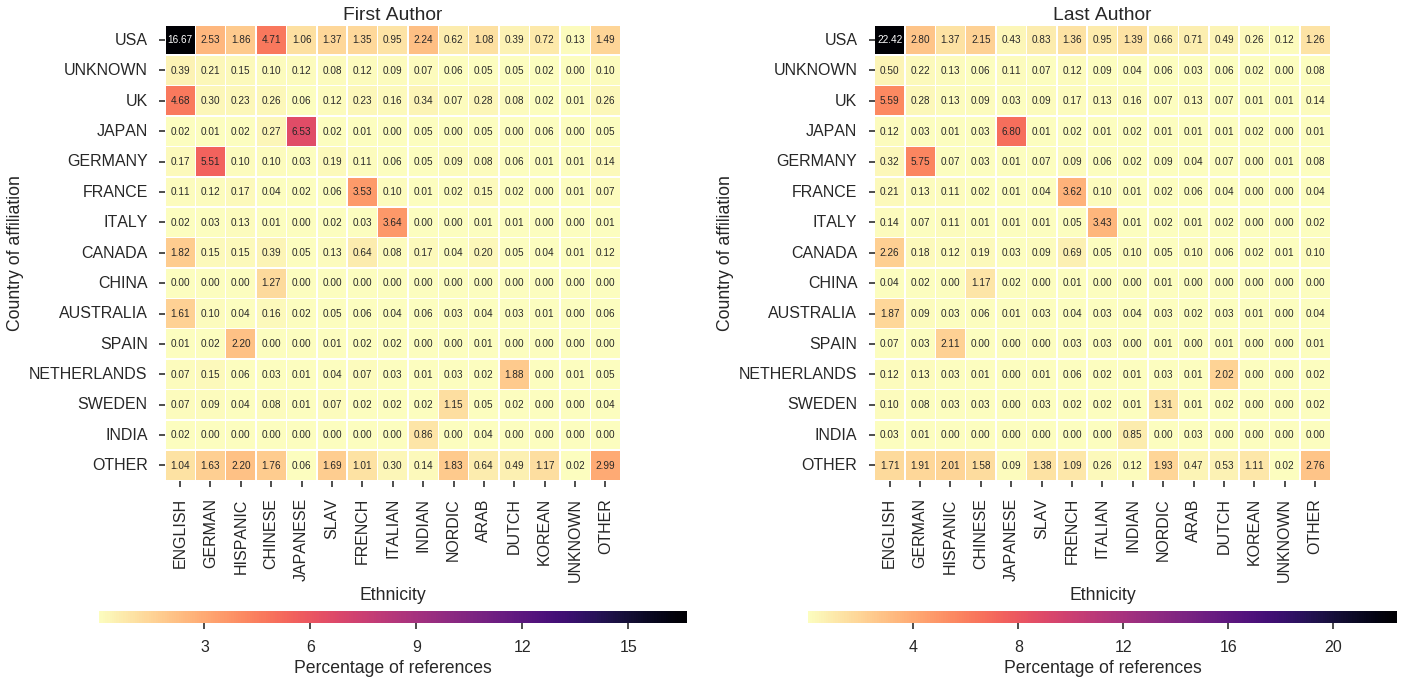

In [5]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax = ax.flatten()

for i, (df_t, lbl) in enumerate(zip([df_t_fa, df_t_la],
                                    ["First Author", "Last Author"])):
    sns.heatmap(df_t, cmap="magma_r",
                annot=True, fmt=".2f", annot_kws={"size": 10},
                linewidths=.5, square=True, ax=ax[i],
                cbar_kws={"orientation": "horizontal", "fraction": 0.1, "pad": 0.2, "aspect": 50})

    ax[i].set_xlabel("Ethnicity")
    ax[i].set_ylabel("Country of affiliation")
    ax[i].set_title(lbl)
    cbar = ax[i].collections[0].colorbar
    cbar.set_label("Percentage of references")

fig.tight_layout()

plt.savefig("Eth_Afl_dist.pdf", bbox_inches="tight")

In [6]:
df_t = df_fa.groupby("eth1")["source_id"].count()
df_t_fa = df_t * 100. / df_t.sum()

df_t = df_la.groupby("eth1")["source_id"].count()
df_t_la = df_t * 100. / df_t.sum()

In [7]:
pd.concat([df_t_fa, df_t_la], axis=1, keys=["First Author", "Last Author"])

,First Author,Last Author
eth1,,
ENGLISH,26.714403,35.496876
GERMAN,10.844779,11.720656
HISPANIC,7.369306,6.269318
CHINESE,9.177842,5.427044
JAPANESE,7.974116,7.573120
SLAV,3.853178,2.667488
FRENCH,7.175478,7.373912
ITALIAN,5.493915,5.168052
INDIAN,4.023502,2.766704


In [8]:
df_t = df_fa.groupby("source_country")["source_id"].count()
df_t_fa = df_t * 100. / df_t.sum()

df_t = df_la.groupby("source_country")["source_id"].count()
df_t_la = df_t * 100. / df_t.sum()

pd.concat([df_t_fa, df_t_la], axis=1, keys=["First Author", "Last Author"])

,First Author,Last Author
source_country,,
USA,37.172439,37.172439
UNKNOWN,1.612572,1.612572
UK,7.101316,7.101316
JAPAN,7.093190,7.093190
GERMANY,6.713442,6.713442
FRANCE,4.410576,4.410576
ITALY,3.907260,3.907260
CANADA,4.042109,4.042109
CHINA,1.277064,1.277064


In [9]:
df_t = df_fa.groupby("gender")["source_id"].count()
df_t_fa = df_t * 100. / df_t.sum()

df_t = df_la.groupby("gender")["source_id"].count()
df_t_la = df_t * 100. / df_t.sum()

pd.concat([df_t_fa, df_t_la], axis=1, keys=["First Author", "Last Author"])

,First Author,Last Author
gender,,
-,13.580998,9.518657
F,29.899968,17.604383
M,56.519034,72.876960


In [10]:
df_t = df_fa.pivot_table(index="source_country", columns="gender", values="source_id", aggfunc=len)
df_t = df_t * 100./ df_t.sum().sum()
df_t.columns = ["UNKNOWN", "FEMALE", "MALE"]
df_t_fa = df_t

df_t = df_la.pivot_table(index="source_country", columns="gender", values="source_id", aggfunc=len)
df_t = df_t * 100./ df_t.sum().sum()
df_t.columns = ["UNKNOWN", "FEMALE", "MALE"]
df_t_la = df_t

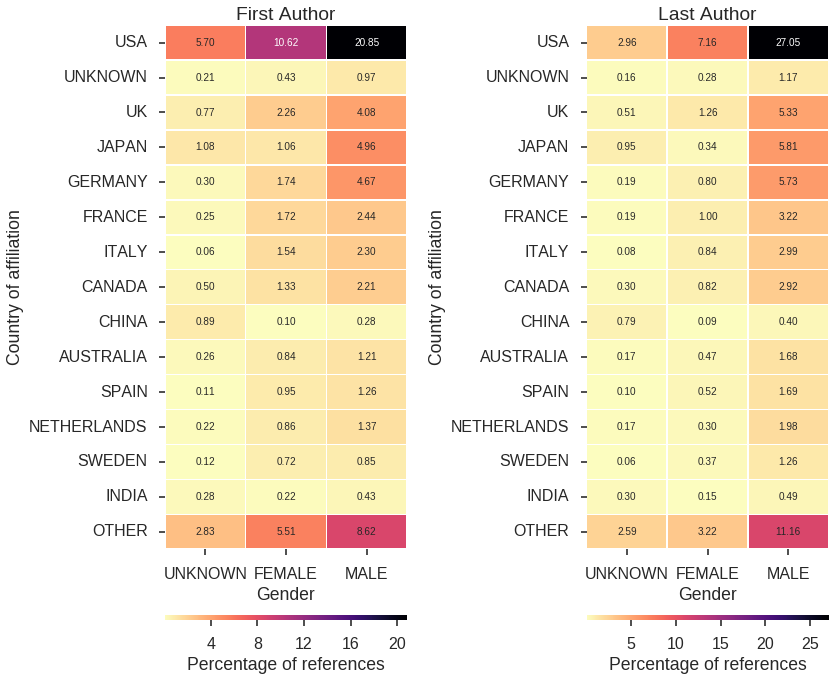

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,10))
ax = ax.flatten()

for i, (df_t, lbl) in enumerate(zip([df_t_fa, df_t_la],
                                    ["First Author", "Last Author"])):
    sns.heatmap(df_t, cmap="magma_r",
                annot=True, fmt=".2f", annot_kws={"size": 10},
                linewidths=.5, square=False, ax=ax[i],
                cbar_kws={"orientation": "horizontal", "fraction": 0.1, "pad": 0.1, "aspect": 50})

    ax[i].set_xlabel("Gender")
    ax[i].set_ylabel("Country of affiliation")
    ax[i].set_title(lbl)
    cbar = ax[i].collections[0].colorbar
    cbar.set_label("Percentage of references")

fig.tight_layout()

plt.savefig("Gender_Afl_dist.pdf", bbox_inches="tight")

In [12]:
df_t = df_fa.pivot_table(index="eth1", columns="gender", values="source_id", aggfunc=len)
df_t = df_t * 100./ df_t.sum().sum()
df_t.columns = ["UNKNOWN", "FEMALE", "MALE"]
df_t_fa = df_t

df_t = df_la.pivot_table(index="eth1", columns="gender", values="source_id", aggfunc=len)
df_t = df_t * 100./ df_t.sum().sum()
df_t.columns = ["UNKNOWN", "FEMALE", "MALE"]
df_t_la = df_t

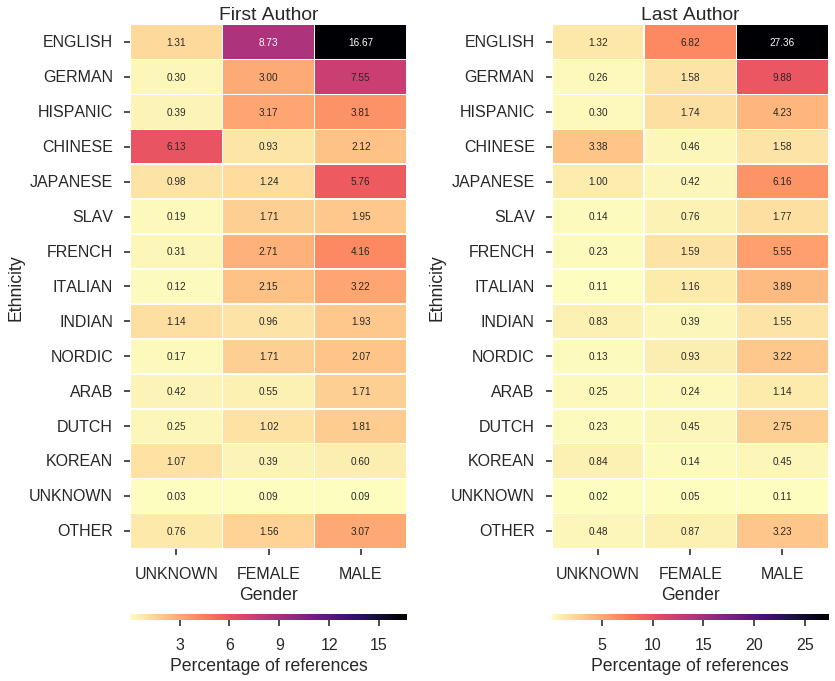

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,10))
ax = ax.flatten()

for i, (df_t, lbl) in enumerate(zip([df_t_fa, df_t_la],
                                    ["First Author", "Last Author"])):
    sns.heatmap(df_t, cmap="magma_r",
                annot=True, fmt=".2f", annot_kws={"size": 10},
                linewidths=.5, square=False, ax=ax[i],
                cbar_kws={"orientation": "horizontal", "fraction": 0.1, "pad": 0.1, "aspect": 50})

    ax[i].set_xlabel("Gender")
    ax[i].set_ylabel("Ethnicity")
    ax[i].set_title(lbl)
    cbar = ax[i].collections[0].colorbar
    cbar.set_label("Percentage of references")

fig.tight_layout()

plt.savefig("Gender_Eth_dist.pdf", bbox_inches="tight")

In [14]:
df_t_fa = df_fa[[u'source_is_eng', u'source_is_journal',
              u'source_is_review', u'source_is_case_rep',
              u'source_is_let_ed_com',u'sink_is_eng',
              u'sink_is_journal', u'sink_is_review',
              u'sink_is_case_rep',
              u'sink_is_let_ed_com', u'journal_same', u'is_self_cite'
             ]].mean()

df_t_la = df_la[[u'source_is_eng', u'source_is_journal',
              u'source_is_review', u'source_is_case_rep',
              u'source_is_let_ed_com',u'sink_is_eng',
              u'sink_is_journal', u'sink_is_review',
              u'sink_is_case_rep',
              u'sink_is_let_ed_com', u'journal_same', u'is_self_cite'
             ]].mean()

In [15]:
pd.concat([df_t_fa, df_t_la], axis=1, keys=["First Author", "Last Author"]) * 100

,First Author,Last Author
source_is_eng,98.226158,98.226158
source_is_journal,98.620712,98.620712
source_is_review,21.701581,21.701581
source_is_case_rep,3.523848,3.523848
source_is_let_ed_com,1.422055,1.422055
sink_is_eng,99.487724,99.487724
sink_is_journal,98.230156,98.230156
sink_is_review,14.190948,14.190948
sink_is_case_rep,3.289576,3.289576
sink_is_let_ed_com,1.795496,1.795496


In [16]:
def plot_matrix(ax, df, index, columns, 
                ylabel, xlabel,
                titles=("All references", "Self-citations", "Proportion self-citations"),
               cmap="gist_earth_r", square=False):
    for i, lbl in enumerate(titles):
        if i == 0:
            df_t = df.pivot_table(index=index, columns=columns, values="source_id", aggfunc=len)
            df_t = df_t * 100./ df_t.sum().sum()
            fmt = ".2f"
        if i == 1:
            df_t = df[df.is_self_cite == 1].pivot_table(
                index=index, columns=columns, values="source_id", aggfunc=len)
            df_t = df_t * 100./ df_t.sum().sum()
            fmt = ".2f"
        if i == 2:
            df_t = df.pivot_table(index=index, columns=columns, values="is_self_cite", aggfunc=np.mean)
            df_t = df_t * 100
            fmt = ".1f"
        print df_t.index
        print df_t.columns
        sns.heatmap(df_t, cmap=cmap,
                    annot=True, fmt=fmt, annot_kws={"size": 10},
                    linewidths=.5, square=square, ax=ax[i],
                    cbar_kws={"orientation": "horizontal", "fraction": 0.1, "pad": 0.1, "aspect": 50})
        if i == 0:
            ax[i].set_ylabel(ylabel)
        else:
            ax[i].set_ylabel("")
        ax[i].set_xlabel(xlabel)
        ax[i].set_title(lbl)
    return ax

CategoricalIndex([u'USA', u'UNKNOWN', u'UK', u'JAPAN', u'GERMANY', u'FRANCE',
                  u'ITALY', u'CANADA', u'CHINA', u'AUSTRALIA', u'SPAIN',
                  u'NETHERLANDS', u'SWEDEN', u'INDIA', u'OTHER'],
                 categories=[u'USA', u'UNKNOWN', u'UK', u'JAPAN', u'GERMANY', u'FRANCE', u'ITALY', u'CANADA', ...], ordered=False, name=u'source_country', dtype='category')
CategoricalIndex([u'-', u'F', u'M'], categories=[u'-', u'F', u'M'], ordered=False, name=u'gender', dtype='category')
CategoricalIndex([u'USA', u'UNKNOWN', u'UK', u'JAPAN', u'GERMANY', u'FRANCE',
                  u'ITALY', u'CANADA', u'CHINA', u'AUSTRALIA', u'SPAIN',
                  u'NETHERLANDS', u'SWEDEN', u'INDIA', u'OTHER'],
                 categories=[u'USA', u'UNKNOWN', u'UK', u'JAPAN', u'GERMANY', u'FRANCE', u'ITALY', u'CANADA', ...], ordered=False, name=u'source_country', dtype='category')
CategoricalIndex([u'-', u'F', u'M'], categories=[u'-', u'F', u'M'], ordered=False, name=u'gender', dtyp

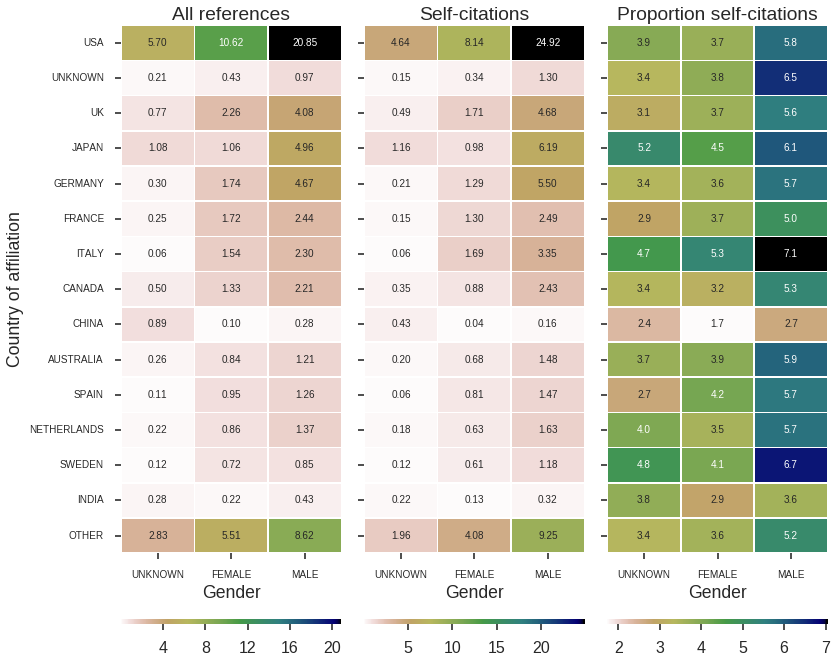

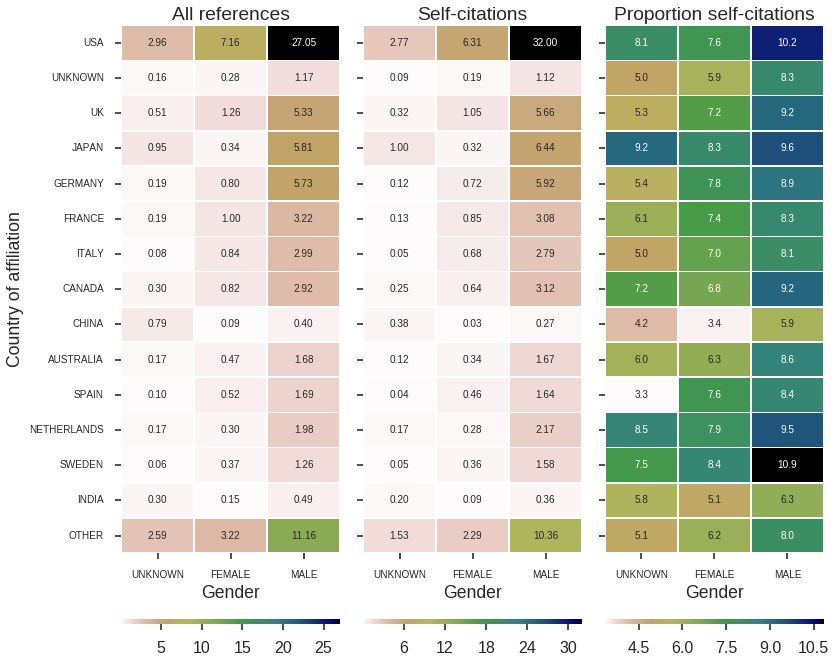

In [17]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,10))
ax = ax.flatten()

index = "source_country"
columns = "gender"
ylabel = "Country of affiliation"
xlabel = "Gender"

ax = plot_matrix(ax, df_fa, index, columns, ylabel, xlabel)
for axi in ax:
    axi.set_xticklabels(["UNKNOWN", "FEMALE", "MALE"], size="x-small", rotation=0)
    axi.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()
plt.savefig("Data_afl_self.first.pdf", bbox_inches="tight")


fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,10))
ax = ax.flatten()

ax = plot_matrix(ax, df_la, index, columns, ylabel, xlabel)
for axi in ax:
    axi.set_xticklabels(["UNKNOWN", "FEMALE", "MALE"], size="x-small", rotation=0)
    axi.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()
plt.savefig("Data_afl_self.last.pdf", bbox_inches="tight")

CategoricalIndex([u'ENGLISH', u'GERMAN', u'HISPANIC', u'CHINESE', u'JAPANESE',
                  u'SLAV', u'FRENCH', u'ITALIAN', u'INDIAN', u'NORDIC',
                  u'ARAB', u'DUTCH', u'KOREAN', u'UNKNOWN', u'OTHER'],
                 categories=[u'ENGLISH', u'GERMAN', u'HISPANIC', u'CHINESE', u'JAPANESE', u'SLAV', u'FRENCH', u'ITALIAN', ...], ordered=False, name=u'eth1', dtype='category')
CategoricalIndex([u'-', u'F', u'M'], categories=[u'-', u'F', u'M'], ordered=False, name=u'gender', dtype='category')
CategoricalIndex([u'ENGLISH', u'GERMAN', u'HISPANIC', u'CHINESE', u'JAPANESE',
                  u'SLAV', u'FRENCH', u'ITALIAN', u'INDIAN', u'NORDIC',
                  u'ARAB', u'DUTCH', u'KOREAN', u'UNKNOWN', u'OTHER'],
                 categories=[u'ENGLISH', u'GERMAN', u'HISPANIC', u'CHINESE', u'JAPANESE', u'SLAV', u'FRENCH', u'ITALIAN', ...], ordered=False, name=u'eth1', dtype='category')
CategoricalIndex([u'-', u'F', u'M'], categories=[u'-', u'F', u'M'], ordered=False, name=u

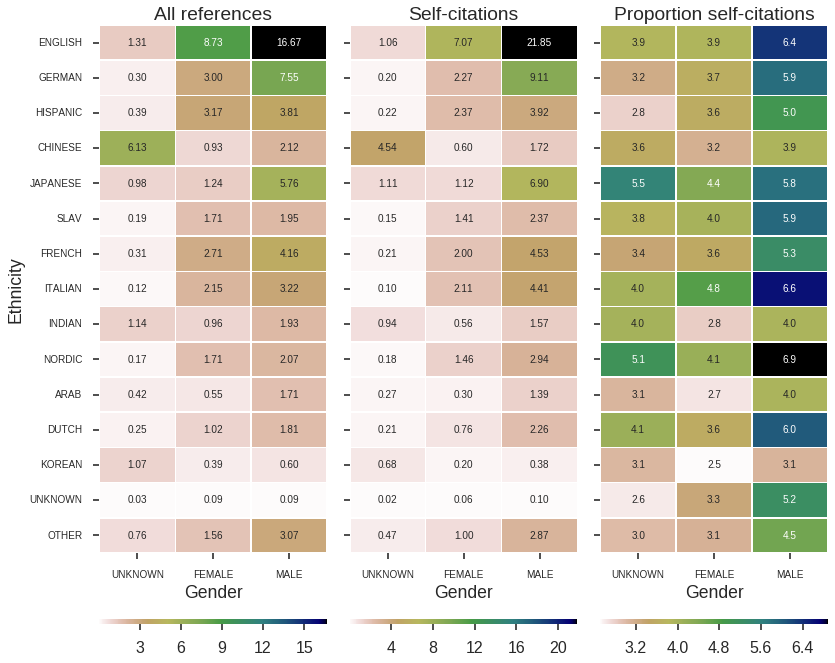

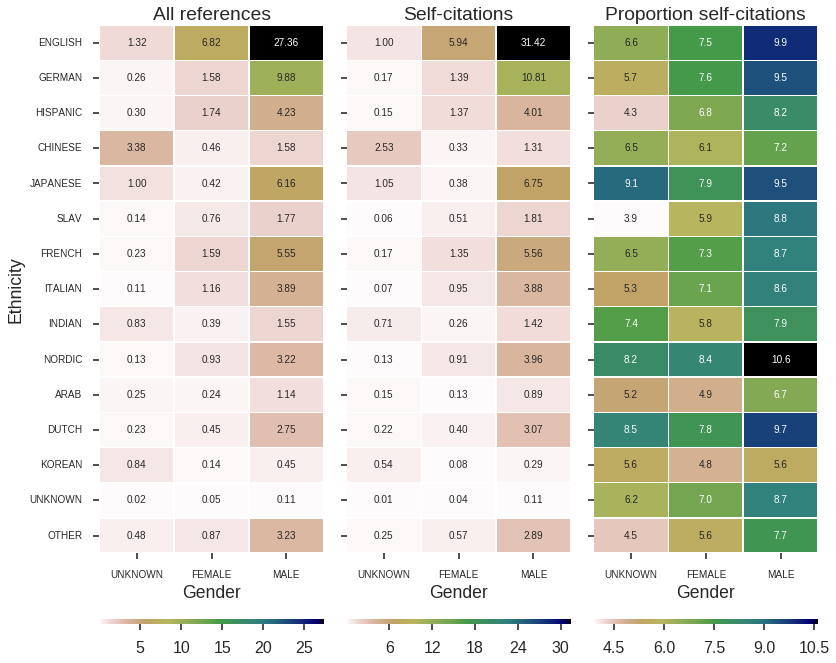

In [18]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,10))
ax = ax.flatten()

index = "eth1"
columns = "gender"
ylabel = "Ethnicity"
xlabel = "Gender"

ax = plot_matrix(ax, df_fa, index, columns, ylabel, xlabel)
for axi in ax:
    axi.set_xticklabels(["UNKNOWN", "FEMALE", "MALE"], size="x-small", rotation=0)
    axi.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()

plt.savefig("Data_eth_self.first.pdf", bbox_inches="tight")

## Last
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,10))
ax = ax.flatten()

ax = plot_matrix(ax, df_la, index, columns, ylabel, xlabel)
for axi in ax:
    axi.set_xticklabels(["UNKNOWN", "FEMALE", "MALE"], size="x-small", rotation=0)
    axi.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()

plt.savefig("Data_eth_self.last.pdf", bbox_inches="tight")

CategoricalIndex([u'USA', u'UNKNOWN', u'UK', u'JAPAN', u'GERMANY', u'FRANCE',
                  u'ITALY', u'CANADA', u'CHINA', u'AUSTRALIA', u'SPAIN',
                  u'NETHERLANDS', u'SWEDEN', u'INDIA', u'OTHER'],
                 categories=[u'USA', u'UNKNOWN', u'UK', u'JAPAN', u'GERMANY', u'FRANCE', u'ITALY', u'CANADA', ...], ordered=False, name=u'source_country', dtype='category')
CategoricalIndex([u'ENGLISH', u'GERMAN', u'HISPANIC', u'CHINESE', u'JAPANESE',
                  u'SLAV', u'FRENCH', u'ITALIAN', u'INDIAN', u'NORDIC',
                  u'ARAB', u'DUTCH', u'KOREAN', u'UNKNOWN', u'OTHER'],
                 categories=[u'ENGLISH', u'GERMAN', u'HISPANIC', u'CHINESE', u'JAPANESE', u'SLAV', u'FRENCH', u'ITALIAN', ...], ordered=False, name=u'eth1', dtype='category')
Index([u'USA', u'UNKNOWN', u'UK', u'JAPAN', u'GERMANY', u'FRANCE', u'ITALY',
       u'CANADA', u'CHINA', u'AUSTRALIA', u'SPAIN', u'NETHERLANDS', u'SWEDEN',
       u'INDIA', u'OTHER'],
      dtype='object', name=u'

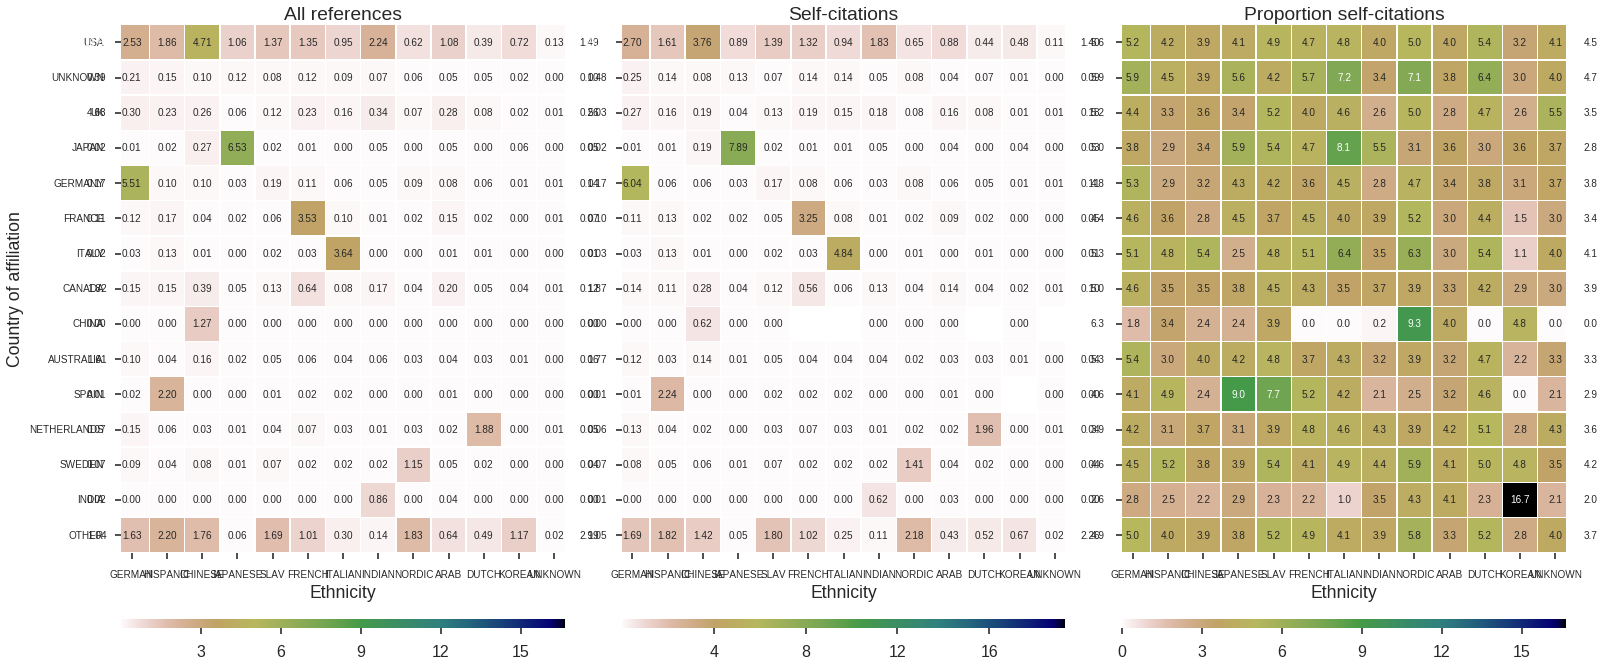

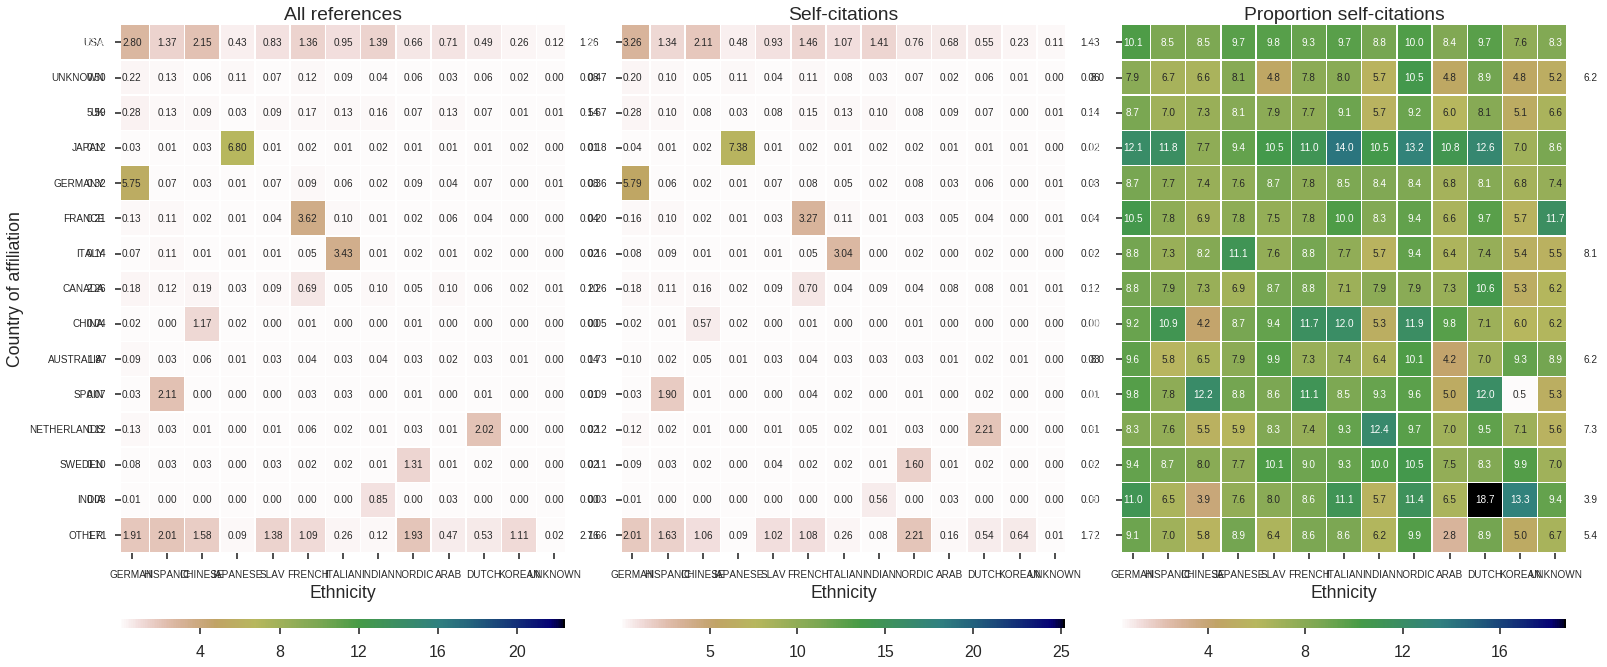

In [20]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(22.5,10))
ax = ax.flatten()

index = "source_country"
columns = "eth1"
ylabel = "Country of affiliation"
xlabel = "Ethnicity"


ax = plot_matrix(ax, df_fa, index, columns, ylabel, xlabel, square=True)
for axi in ax:
    #axi.set_xticklabels(["UNKNOWN", "FEMALE", "MALE"], size="x-small", rotation=0)
    axi.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()
plt.savefig("Data_eth_afl_self.first.pdf", bbox_inches="tight")

## Last

fig, ax = plt.subplots(1,3, sharey=True, figsize=(22.5,10))
ax = ax.flatten()

ax = plot_matrix(ax, df_la, index, columns, ylabel, xlabel, square=True)
for axi in ax:
    #axi.set_xticklabels(["UNKNOWN", "FEMALE", "MALE"], size="x-small", rotation=0)
    axi.tick_params(axis='both', which='major', labelsize=10)

fig.tight_layout()
plt.savefig("Data_eth_afl_self.last.pdf", bbox_inches="tight")